In [107]:
# Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=13
matplotlib.rcParams['figure.figsize']=(36,20)
matplotlib.rcParams['figure.facecolor']='white'

import warnings
warnings.filterwarnings('ignore')


In [108]:
video_games = pd.read_csv('Video_Games.csv')

#check the csv for nulls
video_games.isnull().values.any()

True

In [109]:
#So we find some null values in the csv so I'll manually go through some of the columns to check for nulls
video_games['Global_Sales'].isnull().values.any()
video_games['NA_Sales'].isnull().values.any()
video_games['Critic_Score'].isnull().values.any() #This has null values
video_games['Critic_Count'].isnull().values.any() #This has null values
video_games['User_Score'].isnull().values.any() #This has null values
video_games['User_Count'].isnull().values.any() #This has null values
video_games['Rating'].isnull().values.any() #This has null values


#At this point I will clean the null values by dropping the rows with null values


True

In [110]:
#I will drop the rows that have null values as the null values are most likely to be obscure games that have little to no reviews as well as low sales.
#I will later verify this by checking metacritic for the highest user and critic score

video_games.dropna(subset=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'], inplace=True)


In [111]:
#Here we'll find some general info on the dataset post cleaning
video_games.describe()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6826.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000
mean,2007.437299,0.392840,0.234648,0.063236,0.082189,0.773098,70.263567,28.873615,173.821362
std,4.211160,0.961157,0.682293,0.285257,0.267832,1.948883,13.888922,19.195731,584.511840
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,88.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [112]:
video_games.shape

(6947, 16)

In [114]:
#Section 2 Adding Columns for Analysis
#I'm interested in a column that averages out critic and user score. 
#There is one issue user score is from 0-10 while critic score is 0-100. So I will multiply user score by a factor of 10 for this demonstration.

# Adjusting the user score scale
video_games['Adjusted_User_Score'] = video_games['User_Score'] * 10


#When attempting to average out, I would get an error so I have to check the data types. Initially they returned object and float.
#Both have to be float So I ended up converting them.
print(video_games['User_Score'].dtypes)
print(video_games['Critic_Score'].dtypes)

# Convert to float
video_games['User_Score'] = pd.to_numeric(video_games['User_Score'], errors='coerce')
video_games['Critic_Score'] = pd.to_numeric(video_games['Critic_Score'], errors='coerce')

# Calculating the average score
video_games['Average_Score'] = (video_games['Critic_Score'] + video_games['Adjusted_User_Score']) / 2


float64
float64


In [ ]:
#Checking if the column was added succesfully and if it makes sense
video_games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Adjusted_User_Score,Average_Score
count,6826.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.00000,6947.000000,6947.000000,6947.000000
mean,2007.437299,0.392840,0.234648,0.063236,0.082189,0.773098,70.263567,28.873615,7.18336,173.821362,71.833597,71.048582
std,4.211160,0.961157,0.682293,0.285257,0.267832,1.948883,13.888922,19.195731,1.44200,584.511840,14.419997,12.589546
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.50000,4.000000,5.000000,11.500000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.50000,11.000000,65.000000,64.500000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.50000,27.000000,75.000000,73.500000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.20000,88.000000,82.000000,80.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.60000,10665.000000,96.000000,95.000000


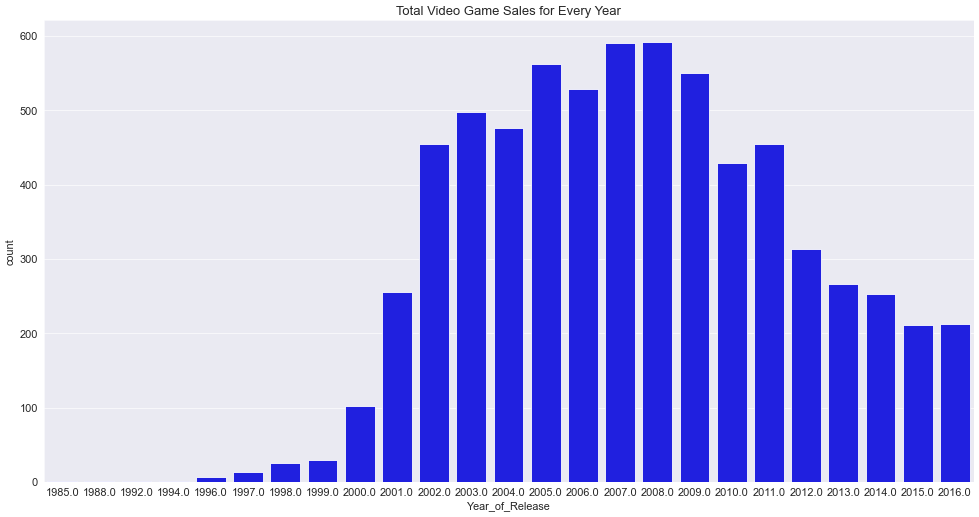

In [ ]:
#Now that this makes sense I can move onto visualizing the data and interpretation
plt.figure(figsize=(20,10),dpi=60)
sns.countplot(x=video_games['Year_of_Release'], color='blue')
plt.title('Total Video Game Sales for Every Year')
plt.show()

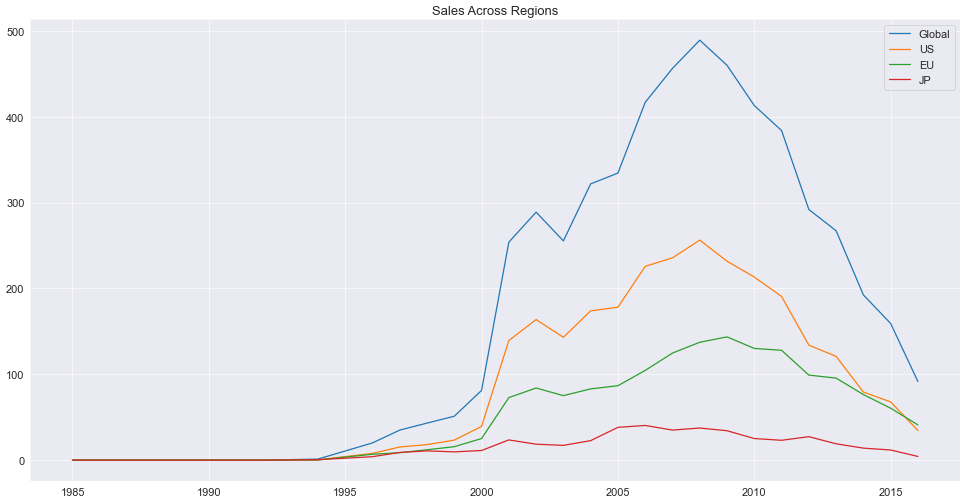

In [ ]:
#Now lets answer some questions that I am trying to answer by visualizing the data
video_games1=video_games.groupby('Year_of_Release',as_index=False).sum()
plt.figure(figsize=(20,10),dpi=60)
x_axis=video_games1['Year_of_Release']
y_axis=video_games1['Global_Sales']

na=video_games1['NA_Sales']
eu=video_games1['EU_Sales']
jp=video_games1['JP_Sales']
total=video_games1['Global_Sales']


plt.plot(x_axis, total, label='Global')
plt.plot(x_axis, na, label='US')
plt.plot(x_axis, eu, label='EU')
plt.plot(x_axis, jp, label='JP')
plt.title('Sales Across Regions')
plt.legend(bbox_to_anchor=(1,1))

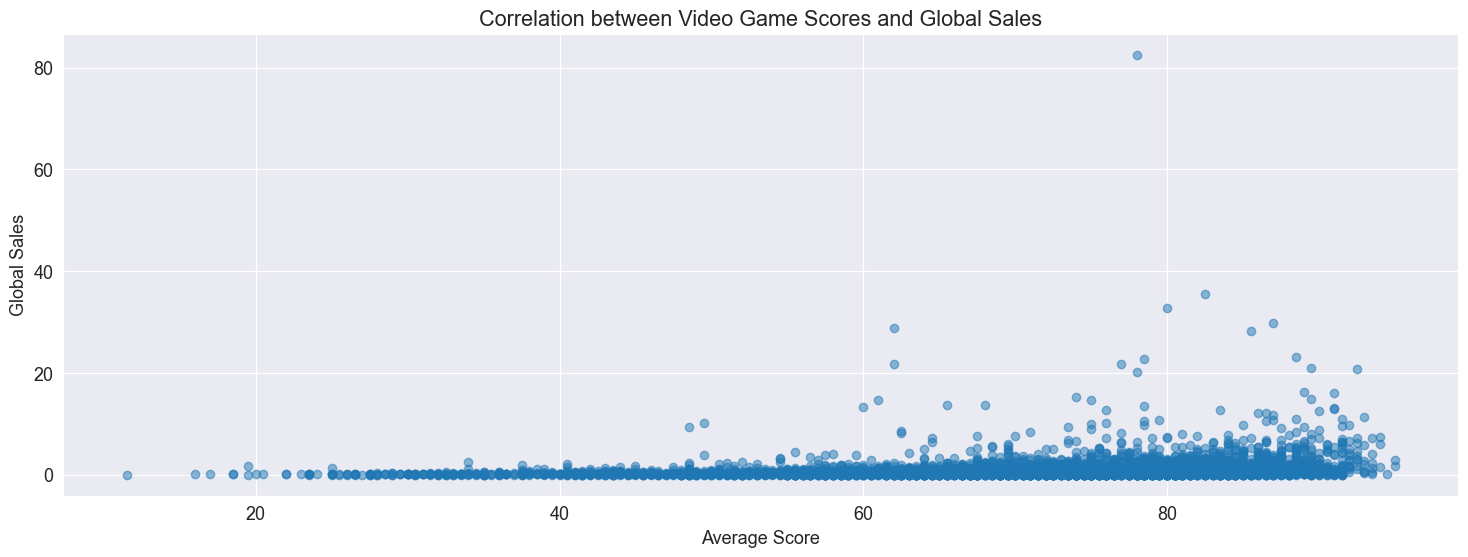

In [ ]:
plt.figure(figsize=(18,6))

average = video_games['Average_Score']
global_sales = video_games['Global_Sales']
# Create a scatter plot
plt.scatter(average, global_sales, alpha=0.5)
plt.xlabel('Average Score')
plt.ylabel('Global Sales')
plt.title('Correlation between Video Game Scores and Global Sales')
plt.show()

#This shows that video game ratings whether by critic or user do largely affect video gamee sales.

In [ ]:
#This is the highest rated game of all time (metacritic).
top_game = video_games.sort_values(by='Critic_Score', ascending=False).iloc[0]
top_game

Name                   Tony Hawk's Pro Skater 2
Platform                                     PS
Year_of_Release                          2000.0
Genre                                    Sports
Publisher                            Activision
NA_Sales                                   3.05
EU_Sales                                   1.41
JP_Sales                                   0.02
Other_Sales                                 0.2
Global_Sales                               4.68
Critic_Score                               98.0
Critic_Count                               19.0
User_Score                                  7.7
User_Count                                299.0
Developer               Neversoft Entertainment
Rating                                        T
Adjusted_User_Score                        77.0
Average_Score                              87.5
Name: 227, dtype: object

In [ ]:
#To Check the highest rated game via Adjusted_User score
top_game1 = video_games.sort_values(by='Adjusted_User_Score', ascending=False).iloc[0]
top_game1

#I'm noticing that the user count is pretty low, would this change the user score if the user count was lets say over 50?

Name                   Boktai: The Sun is in Your Hand
Platform                                           GBA
Year_of_Release                                 2003.0
Genre                                     Role-Playing
Publisher                 Konami Digital Entertainment
NA_Sales                                           0.1
EU_Sales                                          0.04
JP_Sales                                           0.0
Other_Sales                                        0.0
Global_Sales                                      0.15
Critic_Score                                      83.0
Critic_Count                                      31.0
User_Score                                         9.6
User_Count                                        16.0
Developer                                         KCEJ
Rating                                               E
Adjusted_User_Score                               96.0
Average_Score                                     89.5
Name: 8976

In [ ]:
#To Check the highest rated game via Adjusted_User score with user count over 50
filtered_games = video_games[video_games['User_Count'] > 50]
top_game1 = filtered_games.sort_values(by='Adjusted_User_Score', ascending=False).iloc[0]
top_game1
#Harvest moon is now the highest rated user scoring game

Name                   Harvest Moon: Friends of Mineral Town
Platform                                                 GBA
Year_of_Release                                       2003.0
Genre                                             Simulation
Publisher                                            Ubisoft
NA_Sales                                                0.34
EU_Sales                                                0.13
JP_Sales                                                0.11
Other_Sales                                             0.01
Global_Sales                                            0.59
Critic_Score                                            81.0
Critic_Count                                            25.0
User_Score                                               9.6
User_Count                                             116.0
Developer                                               TOSE
Rating                                                     E
Adjusted_User_Score     

In [ ]:
#Now to check the highest rated game via the newly added Average_Score column
top_game2 = video_games.sort_values(by='Average_Score', ascending=False).iloc[0]
top_game2

#I dont have to filter for critic or user count here as the counts are already high here.

Name                   Resident Evil 4
Platform                            GC
Year_of_Release                 2005.0
Genre                           Action
Publisher                       Capcom
NA_Sales                          0.98
EU_Sales                          0.42
JP_Sales                          0.22
Other_Sales                       0.06
Global_Sales                      1.69
Critic_Score                      96.0
Critic_Count                      82.0
User_Score                         9.4
User_Count                       767.0
Developer                       Capcom
Rating                               M
Adjusted_User_Score               94.0
Average_Score                     95.0
Name: 1068, dtype: object

In [ ]:
#Checking the top 20 most sold games from 2007 to 2015
top_2007_2016_games = video_games.loc[(video_games['Year_of_Release'] >= 2007) & (video_games['Year_of_Release'] <= 2016)]

top_2007_2016_games.sort_values('Global_Sales',ascending=False).head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Adjusted_User_Score,Average_Score
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,83.0,82.5
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,80.0,80.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,84.0,85.5
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,77.0,78.5
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,63.0,62.0
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,74.0,77.0
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,82.0,89.5
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,81.0,89.0
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M,34.0,61.0
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M,63.0,75.0


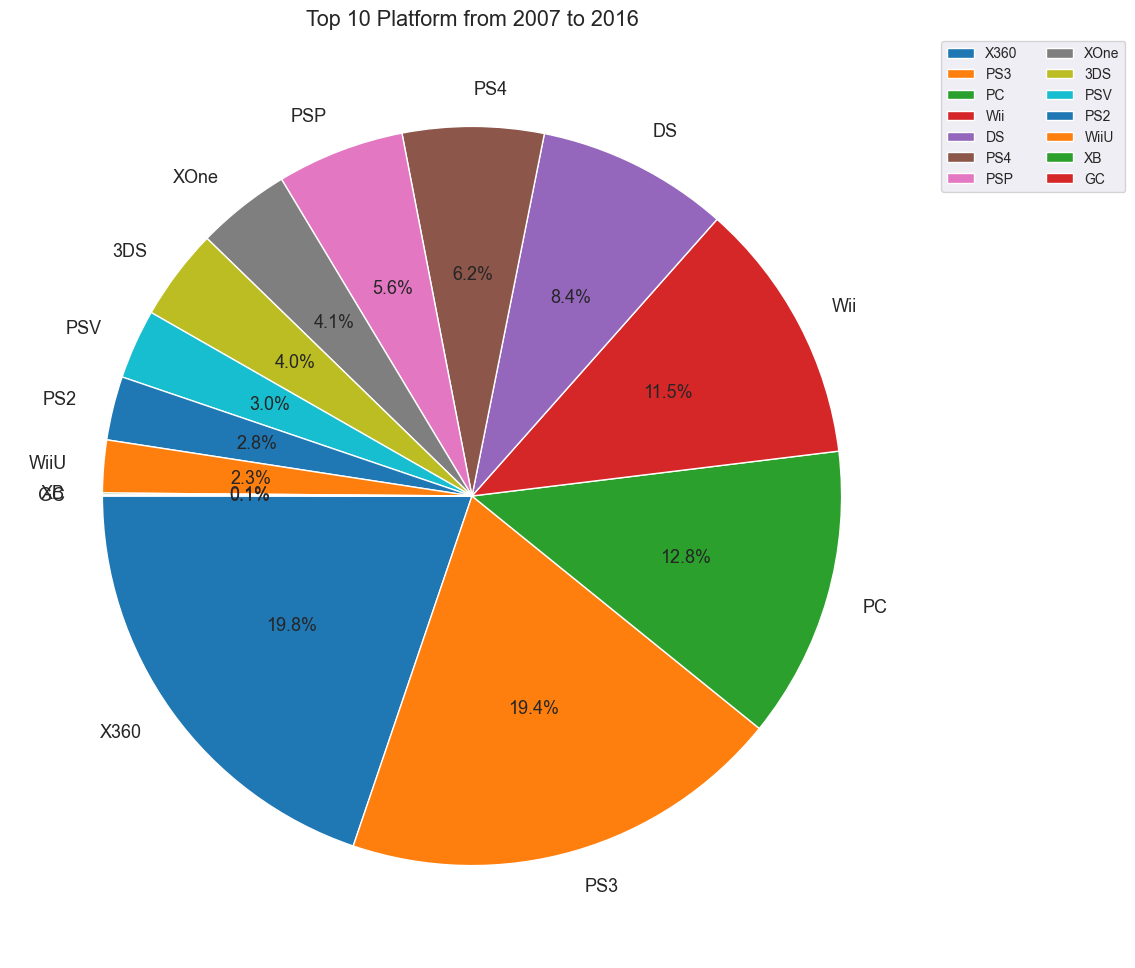

In [ ]:
#Showcasing the most popular gaming platforms from 2007 to 2016
platform_amount=top_2007_2016_games['Platform'].value_counts()
platform_amount

plt.figure(figsize=(24,12))
plt.title('Top 10 Platform from 2007 to 2016')
plt.pie(platform_amount,labels=platform_amount.index, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10,bbox_to_anchor=(1,1),ncol=2)


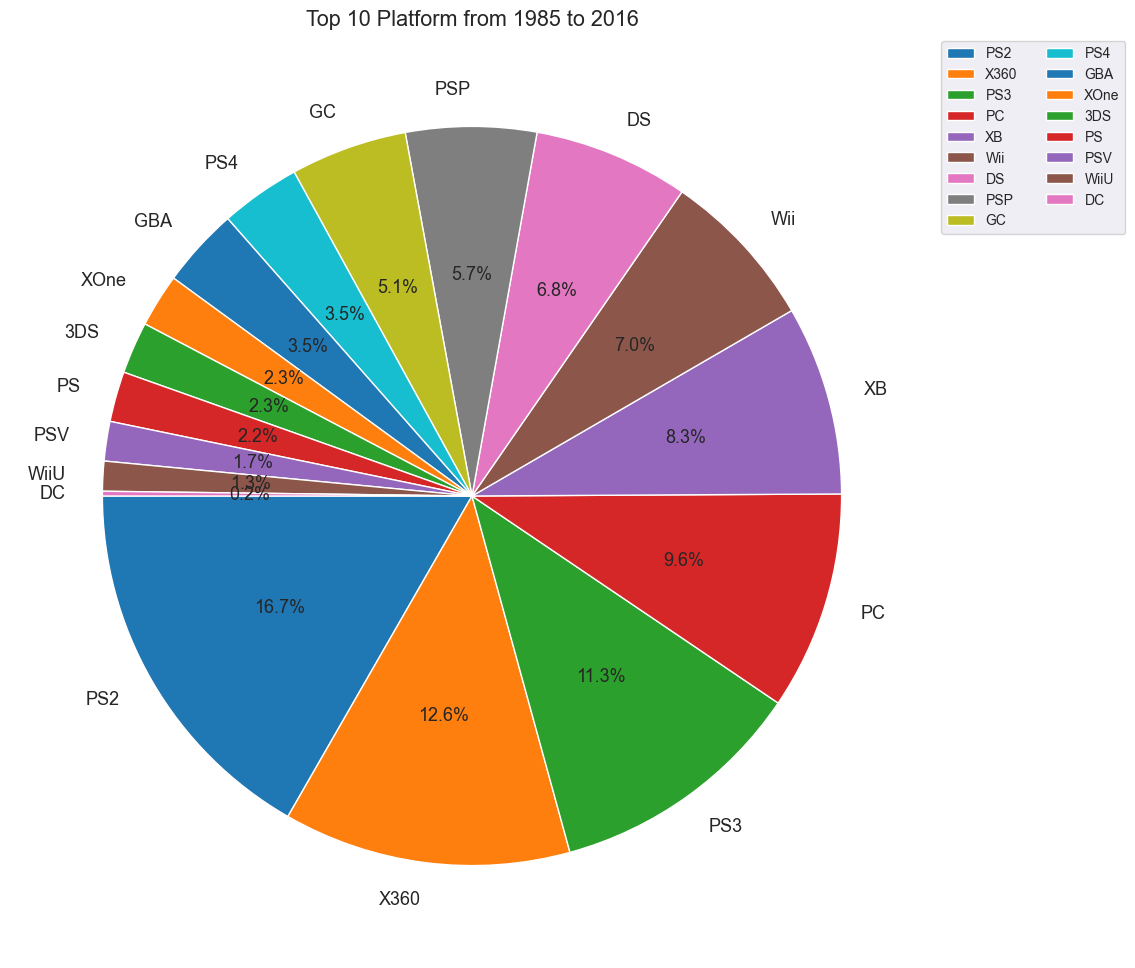

In [ ]:
#Showcasing the most popular gaming platforms from 1985 to 2016 (ALL TIME FROM DATA SET)
top_1985_2016_games = video_games.loc[(video_games['Year_of_Release'] >= 1985) & (video_games['Year_of_Release'] <= 2016)]

top_1985_2016_games.sort_values('Global_Sales',ascending=False).head(20)

platform_amount=top_1985_2016_games['Platform'].value_counts()
platform_amount

plt.figure(figsize=(24,12))
plt.title('Top 10 Platform from 1985 to 2016')
plt.pie(platform_amount,labels=platform_amount.index, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10,bbox_to_anchor=(1,1),ncol=2)

In [ ]:
#Show the most popular video game genres by seeing how often they appear in the data
top10_genre=video_games['Genre'].value_counts().head(10)
top10_genre

Genre
Action          1663
Sports           965
Shooter          882
Role-Playing     718
Racing           591
Platform         407
Misc             394
Fighting         382
Simulation       301
Strategy         274
Name: count, dtype: int64

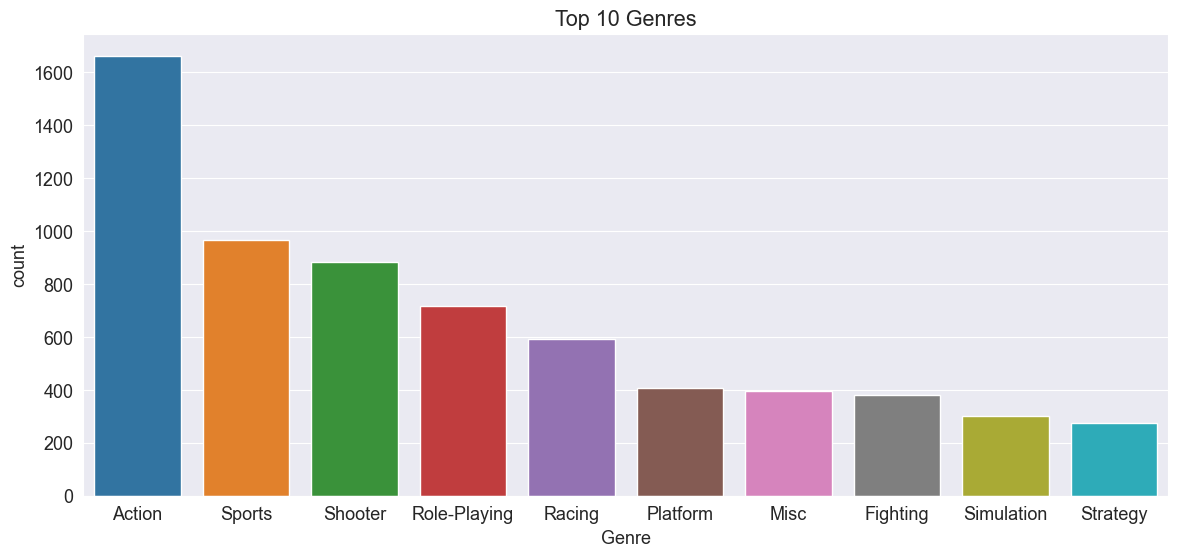

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=top10_genre.index, y=top10_genre)
plt.title('Top 10 Video Game Genres')
plt.show()